In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Set plotting style
sns.set(style="whitegrid")

In [ ]:
credit_card_fraud_data = pd.read_csv("CC.csv")

In [ ]:
credit_card_fraud_data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,2,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,3,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,4,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,5,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37112 entries, 0 to 37111
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37112 non-null  int64  
 1   Time        37112 non-null  int64  
 2   V1          37112 non-null  float64
 3   V2          37112 non-null  float64
 4   V3          37112 non-null  float64
 5   V4          37112 non-null  float64
 6   V5          37112 non-null  float64
 7   V6          37112 non-null  float64
 8   V7          37112 non-null  float64
 9   V8          37112 non-null  float64
 10  V9          37112 non-null  float64
 11  V10         37112 non-null  float64
 12  V11         37112 non-null  float64
 13  V12         37112 non-null  float64
 14  V13         37112 non-null  float64
 15  V14         37112 non-null  float64
 16  V15         37112 non-null  float64
 17  V16         37112 non-null  float64
 18  V17         37112 non-null  float64
 19  V18         37112 non-nul

In [ ]:
# Check for missing values
print("\nMissing Values:\n", credit_card_fraud_data.isnull().sum())


Missing Values:
 Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           1
V22           1
V23           1
V24           1
V25           1
V26           1
V27           1
V28           1
Amount        1
Class         1
dtype: int64


In [ ]:
# Fill missing values using the mean of each column
credit_card_fraud_data.fillna(credit_card_fraud_data.mean(), inplace=True)

In [ ]:
# Verify that there are no missing values left
print("\nMissing Values After Filling:\n", credit_card_fraud_data.isnull().sum())


Missing Values After Filling:
 Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64


In [ ]:
# Drop unnecessary columns like 'Unnamed: 0' if they do not contribute to the analysis
credit_card_fraud_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# Standardize the 'Time' and 'Amount' columns
scaler = StandardScaler()
credit_card_fraud_data[['Time', 'Amount']] = scaler.fit_transform(credit_card_fraud_data[['Time', 'Amount']])

# Verify the scaling
print("\nScaled 'Time' and 'Amount':\n", credit_card_fraud_data[['Time', 'Amount']].head())


Scaled 'Time' and 'Amount':
        Time    Amount
0 -1.963294  0.276568
1 -1.963294 -0.356813
2 -1.963214  1.263906
3 -1.963214  0.163971
4 -1.963134 -0.066698


In [ ]:
# Check class distribution to understand imbalance
print("\nClass Distribution:\n", credit_card_fraud_data['Class'].value_counts())


Class Distribution:
 Class
0.000000    37008
1.000000      103
0.002775        1
Name: count, dtype: int64


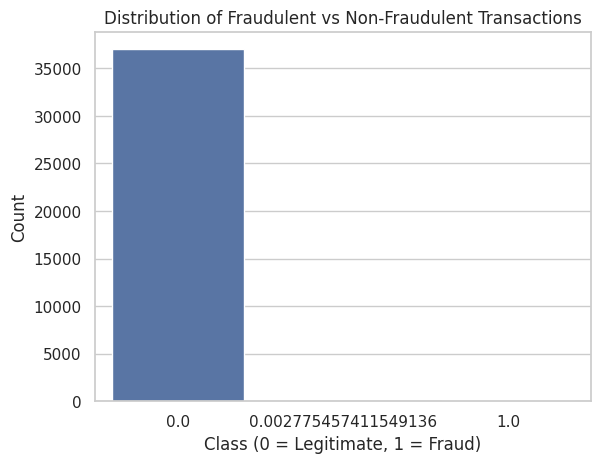

In [ ]:
# Class distribution
sns.countplot(x='Class', data=credit_card_fraud_data)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0 = Legitimate, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

In [ ]:
credit_card_fraud_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,37112.0,1.470405e-16,1.000013,-1.963294,-0.892894,0.404854,0.815336,1.142434
V1,37112.0,-2.077330e-01,1.829565,-30.552380,-0.960967,-0.233287,1.161880,1.960497
V2,37112.0,6.257887e-02,1.543490,-40.978852,-0.511007,0.109256,0.749778,16.713389
V3,37112.0,7.178485e-01,1.525225,-31.103685,0.240832,0.823149,1.452953,4.101716
V4,37112.0,1.931140e-01,1.404705,-5.172595,-0.714513,0.189758,1.074913,13.143668
V5,37112.0,-2.200981e-01,1.382092,-42.147898,-0.824894,-0.258228,0.302762,34.099309
V6,37112.0,9.893213e-02,1.308634,-23.496714,-0.641084,-0.160419,0.488131,22.529298
V7,37112.0,-1.153773e-01,1.252824,-26.548144,-0.596820,-0.073669,0.435013,36.677268
V8,37112.0,3.434175e-02,1.234041,-41.484823,-0.155001,0.045083,0.310259,20.007208
V9,37112.0,2.421076e-01,1.232626,-7.175097,-0.535549,0.116358,0.971446,10.392889


In [ ]:
# Strong correlations with 'Class'
corr_matrix = credit_card_fraud_data.corr()
correlation_with_class = corr_matrix['Class'].sort_values(ascending=False)
print("\nCorrelations with Class:\n", correlation_with_class)


Correlations with Class:
 Class     1.000000
V11       0.235360
V4        0.214765
V2        0.197424
V8        0.163887
V27       0.110571
V20       0.046971
V21       0.045572
V19       0.033113
V25       0.019823
V28       0.017336
V26       0.016542
V13       0.006153
Amount    0.001139
V15      -0.006551
Time     -0.017035
V22      -0.019970
V24      -0.021423
V23      -0.030673
V6       -0.096955
V9       -0.137126
V18      -0.170814
V5       -0.199775
V1       -0.217849
V16      -0.280192
V12      -0.296352
V10      -0.309038
V7       -0.321200
V14      -0.393650
V3       -0.403827
V17      -0.409644
Name: Class, dtype: float64


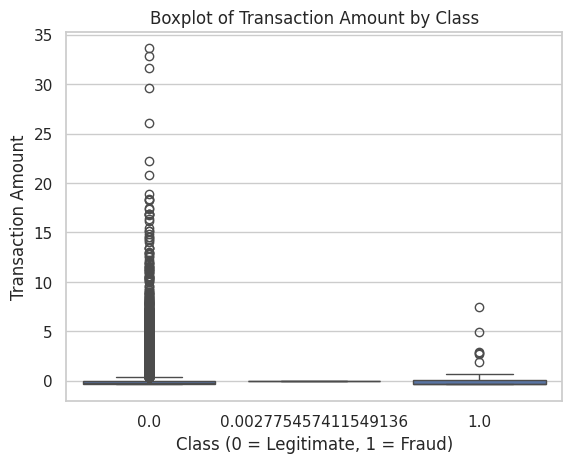

In [ ]:
# Boxplot for 'Amount' feature
sns.boxplot(x='Class', y='Amount', data=credit_card_fraud_data)
plt.title('Boxplot of Transaction Amount by Class')
plt.xlabel('Class (0 = Legitimate, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

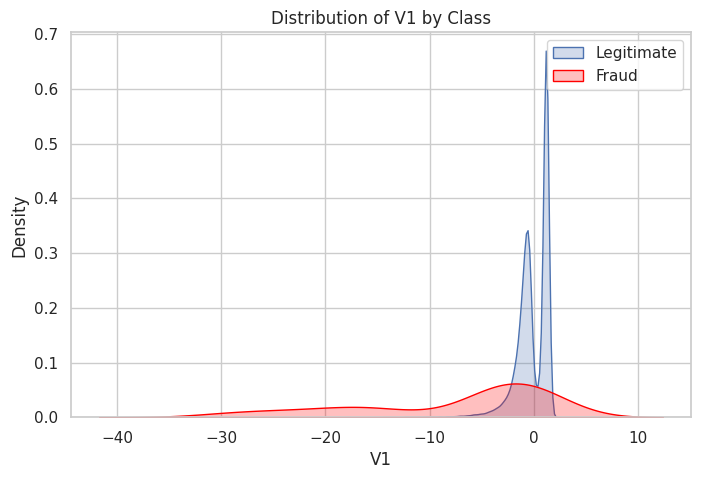

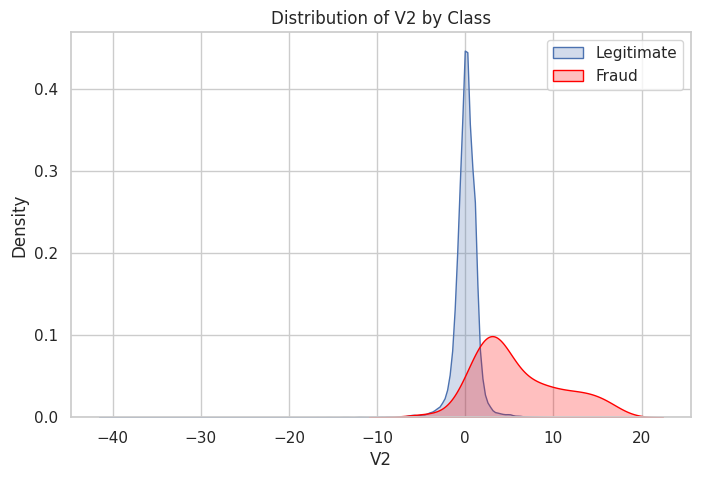

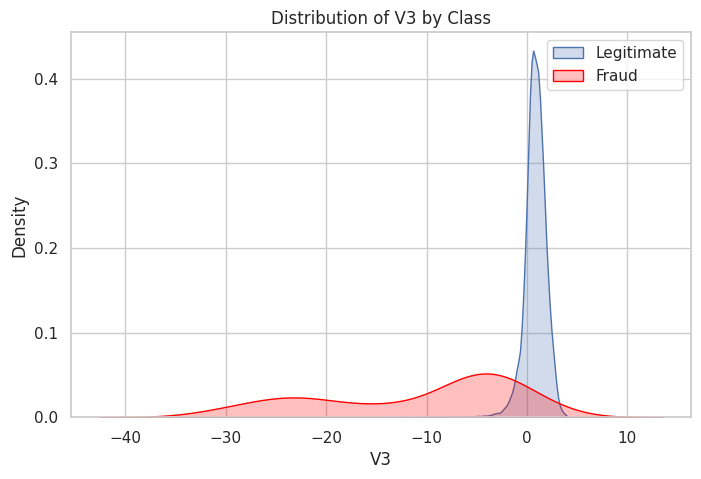

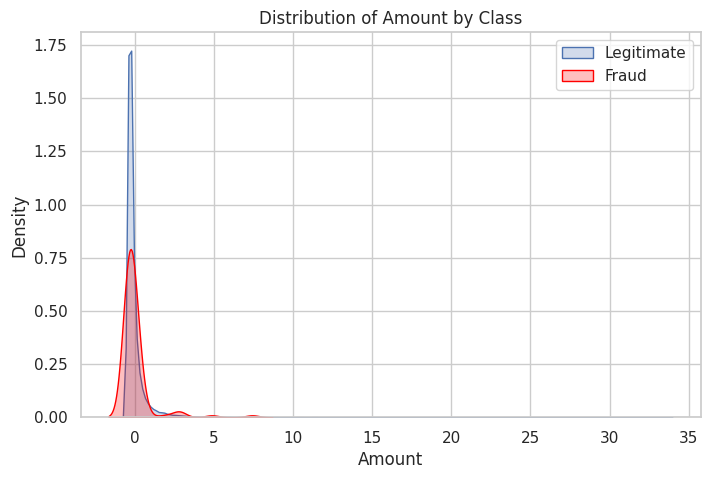

In [ ]:
# KDE plot for selected feature comparisons
for feature in ['V1', 'V2', 'V3', 'Amount']:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=credit_card_fraud_data[credit_card_fraud_data['Class'] == 0], x=feature, label='Legitimate', fill=True)
    sns.kdeplot(data=credit_card_fraud_data[credit_card_fraud_data['Class'] == 1], x=feature, label='Fraud', fill=True, color='red')
    plt.title(f'Distribution of {feature} by Class')
    plt.legend()
    plt.show()

In [ ]:
# Check for any unexpected classes
unexpected_classes = credit_card_fraud_data['Class'].unique()
print("Unexpected Classes: ", unexpected_classes)

Unexpected Classes:  [0.         1.         0.00277546]


In [ ]:
# Remove any rows with values other than 0 or 1
credit_card_fraud_data = credit_card_fraud_data[credit_card_fraud_data['Class'].isin([0, 1])]

# Verify the class distribution again
print(credit_card_fraud_data['Class'].value_counts())

Class
0.0    37008
1.0      103
Name: count, dtype: int64


In [ ]:
# Prepare the features (X) and the target (y)
X = credit_card_fraud_data.drop('Class', axis=1)
y = credit_card_fraud_data['Class']

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new distribution of the target variable
print("\nResampled Class Distribution in Training Set:")
print(pd.Series(y_train_resampled).value_counts())


Resampled Class Distribution in Training Set:
Class
0.0    29609
1.0    29609
Name: count, dtype: int64


In [ ]:
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

In [ ]:
# Initialize and train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
dt_predictions = dt_model.predict(X_test_resampled)

# Print classification report
print("Decision Tree Classifier Performance:")
print(classification_report(y_test_resampled, dt_predictions))

Decision Tree Classifier Performance:
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      7399
         1.0       1.00      0.77      0.87      7399

    accuracy                           0.89     14798
   macro avg       0.91      0.89      0.88     14798
weighted avg       0.91      0.89      0.88     14798



In [ ]:
# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
rf_predictions = rf_model.predict(X_test_resampled)

# Print classification report
print("Random Forest Classifier Performance:")
print(classification_report(y_test_resampled, rf_predictions))

Random Forest Classifier Performance:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      7399
         1.0       1.00      0.86      0.93      7399

    accuracy                           0.93     14798
   macro avg       0.94      0.93      0.93     14798
weighted avg       0.94      0.93      0.93     14798



In [ ]:
# Initialize and train XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test_resampled)

# Print classification report
print("XGBoost Classifier Performance:")
print(classification_report(y_test_resampled, xgb_predictions))

XGBoost Classifier Performance:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      7399
         1.0       1.00      0.91      0.95      7399

    accuracy                           0.95     14798
   macro avg       0.96      0.95      0.95     14798
weighted avg       0.96      0.95      0.95     14798



In [ ]:
# Initialize and train Neural Network (Multi-layer Perceptron)
nn_model = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)
nn_model.fit(X_train_resampled, y_train_resampled)

MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)

In [ ]:
# Make predictions on the test set
nn_predictions = nn_model.predict(X_test_resampled)

# Print classification report
print("Neural Network (MLP) Performance:")
print(classification_report(y_test_resampled, nn_predictions))

Neural Network (MLP) Performance:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      7399
         1.0       1.00      0.88      0.93      7399

    accuracy                           0.94     14798
   macro avg       0.95      0.94      0.94     14798
weighted avg       0.95      0.94      0.94     14798



<ipython-input-49-fab0d90e82dc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')


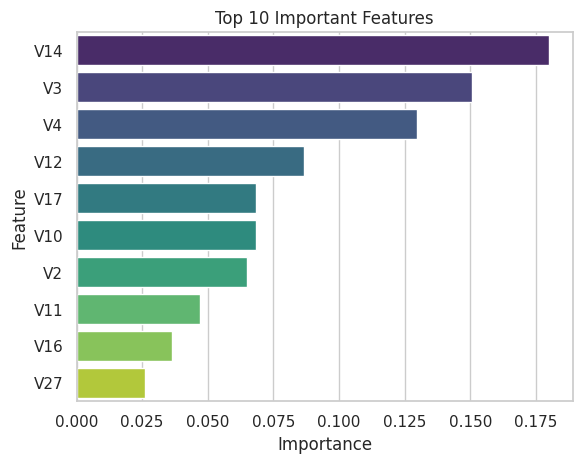

In [ ]:
# Feature importance plot
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Important Features')
plt.show()